In [1]:
import numpy as np 
import pandas as pd 
import datetime
import re
import os, os.path
import time
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
cd ../Training_Data

/app/data/Training_Data


In [2]:
sb.set_palette("husl",4)
sb.set_style("whitegrid")

In [4]:
train_set = pd.read_csv('processed_train_set.csv',converters={'acceleration': eval})
test_set = pd.read_csv('processed_test_set.csv',converters={'acceleration': eval})
val_set = pd.read_csv('processed_val_set.csv',converters={'acceleration': eval})

In [4]:
    trainingData = pd.read_csv('../Training_Data/processed_train_set_half.csv',converters={'acceleration': eval})
    testingData = pd.read_csv('../Training_Data/processed_test_set_half.csv',converters={'acceleration': eval})
    validationData = pd.read_csv('../Training_Data/processed_val_set_half.csv',converters={'acceleration': eval})

In [9]:
train_set = trainingData
test_set = testingData
val_set = validationData

In [3]:
cd ../Model


/app/data/Model


In [10]:
def calculate_model_size(model):
    print(model.summary())
    var_sizes = [
      np.product(list(map(int, v.shape))) * v.dtype.size
      for v in model.trainable_variables
      ]
    print("Model size:", sum(var_sizes) / 1024, "KB")

In [19]:
samples = len(train_set['acceleration'][0])

lstm_model = tf.keras.Sequential([
      tf.keras.layers.Bidirectional(
          tf.keras.layers.LSTM(22),
          input_shape=(samples, 3)),  # output_shape=(batch, 253)
      tf.keras.layers.Dense(5, activation="sigmoid")  # (batch, 4)
])

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (4, 3),padding="same",activation="relu",
                           input_shape=(samples, 3, 1)),  # output_shape=(batch, 760, 3, 8)
    tf.keras.layers.MaxPool2D((3, 3)),  # (batch, 253, 1, 8)
    tf.keras.layers.Dropout(0.1),  # (batch, 253, 1, 8)
    tf.keras.layers.Conv2D(16, (4, 1), padding="same",activation="relu"), # (batch, 253, 1, 16)
    tf.keras.layers.MaxPool2D((3, 1), padding="same"),  # (batch, 84, 1, 16)
    tf.keras.layers.Dropout(0.1),  # (batch, 84, 1, 16)
    tf.keras.layers.Flatten(),  # (batch, 1344)
    tf.keras.layers.Dense(16, activation="relu"),  # (batch, 16)
    tf.keras.layers.Dropout(0.1),  # (batch, 16)
    tf.keras.layers.Dense(5, activation="softmax")  # (batch, 4)
])

cnn_model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (4, 3),padding="same",activation="relu",
                           input_shape=(samples, 3, 1)),  # output_shape=(batch, 760, 3, 8)
    tf.keras.layers.MaxPool2D((3, 3)),  # (batch, 253, 1, 8)
    tf.keras.layers.Dropout(0.1),  # (batch, 253, 1, 8)
    tf.keras.layers.Conv2D(16, (4, 1), padding="same",activation="relu"), # (batch, 253, 1, 16)
    tf.keras.layers.MaxPool2D((3, 1), padding="same"),  # (batch, 84, 1, 16)
    tf.keras.layers.Dropout(0.1),  # (batch, 84, 1, 16)
    tf.keras.layers.Flatten(),  # (batch, 1344)
    tf.keras.layers.Dense(16, activation="relu"),  # (batch, 16)
    tf.keras.layers.Dropout(0.1),  # (batch, 16)
    tf.keras.layers.Dense(5, activation="softmax")  # (batch, 4)
])

#unused
cnn_model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (4, 3),padding="same",activation="relu",
                           input_shape=(samples, 3, 1)),  # output_shape=(batch, 760, 3, 8)
    tf.keras.layers.MaxPool2D((6, 3)),  # (batch, 126, 1, 8)
    tf.keras.layers.Dropout(0.1),  # (batch, 126, 1, 8)
    tf.keras.layers.Conv2D(16, (4, 1), padding="same",activation="relu"), # (batch, 126, 1, 16)
    tf.keras.layers.MaxPool2D((6, 1), padding="same"),  # (batch, 21, 1, 16)
    tf.keras.layers.Dropout(0.1),  # (batch, 21, 1, 16)
    tf.keras.layers.Flatten(),  # (batch, 336)
    tf.keras.layers.Dense(16, activation="relu"),  # (batch, 16)
    tf.keras.layers.Dropout(0.1),  # (batch, 16)
    tf.keras.layers.Dense(5, activation="softmax")  # (batch, 4)
])

In [12]:
tensor_train_set = tf.data.Dataset.from_tensor_slices(
    (np.array(train_set['acceleration'].tolist(),dtype=np.float64),
     train_set['gesture'].tolist()))

tensor_test_set = tf.data.Dataset.from_tensor_slices(
    (np.array(test_set['acceleration'].tolist(),dtype=np.float64),
     test_set['gesture'].tolist()))

tensor_val_set = tf.data.Dataset.from_tensor_slices(
    (np.array(val_set['acceleration'].tolist(),dtype=np.float64),
     val_set['gesture'].tolist()))

In [20]:
calculate_model_size(lstm_model)
epochs_cnn = 20
epochs_lstm = 20
batch_size = 64
batch_size2 = 192

lstm_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

calculate_model_size(cnn_model)
cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

calculate_model_size(cnn_model2)
cnn_model2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

calculate_model_size(cnn_model3)
cnn_model3.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 44)                4576      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 225       
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________
None
Model size: 18.75390625 KB
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 380, 3, 8)         104       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 126, 1, 8)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 126, 1, 8)         0        

In [14]:
tensor_train_set_lstm = tensor_train_set.batch(batch_size).repeat()
tensor_val_set_lstm = tensor_val_set.batch(batch_size)
tensor_test_set_lstm = tensor_test_set.batch(batch_size)

In [21]:
history_LSTM = lstm_model.fit(
    tensor_train_set_lstm,
    epochs=epochs_lstm,
    validation_data=tensor_val_set_lstm,
    steps_per_epoch=200,
    validation_steps=int((len(val_set) - 1) / batch_size + 1))

Epoch 1/20
200/200 [==============================] - 23s 117ms/step - loss: 1.2752 - accuracy: 0.5774 - val_loss: 0.9944 - val_accuracy: 0.7021
Epoch 2/20
200/200 [==============================] - 22s 111ms/step - loss: 0.8526 - accuracy: 0.7520 - val_loss: 0.6331 - val_accuracy: 0.7872
Epoch 3/20
200/200 [==============================] - 22s 112ms/step - loss: 0.5645 - accuracy: 0.8505 - val_loss: 0.3981 - val_accuracy: 0.9149
Epoch 4/20
200/200 [==============================] - 23s 113ms/step - loss: 0.3760 - accuracy: 0.9135 - val_loss: 0.2944 - val_accuracy: 0.9149
Epoch 5/20
200/200 [==============================] - 23s 117ms/step - loss: 0.2960 - accuracy: 0.9295 - val_loss: 0.2585 - val_accuracy: 0.9362
Epoch 6/20
200/200 [==============================] - 24s 119ms/step - loss: 0.2423 - accuracy: 0.9427 - val_loss: 0.2002 - val_accuracy: 0.9362
Epoch 7/20
200/200 [==============================] - 23s 116ms/step - loss: 0.2002 - accuracy: 0.9503 - val_loss: 0.2064 - val_ac

In [23]:
loss_lstm, acc_lstm = lstm_model.evaluate(tensor_test_set_lstm)
pred_lstm = np.argmax(lstm_model.predict(tensor_test_set_lstm), axis=1)
confusion_lstm = tf.math.confusion_matrix(
    labels=tf.constant(test_set['gesture'].to_numpy()),
    predictions=tf.constant(pred_lstm),
    num_classes=5)

1/1 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9688


In [24]:
print(confusion_lstm)
print("Loss {}, Accuracy {}".format(loss_lstm, acc_lstm))

tf.Tensor(
[[12  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 12  2]
 [ 0  0  0  0  8]], shape=(5, 5), dtype=int32)
Loss 0.10723546892404556, Accuracy 0.96875


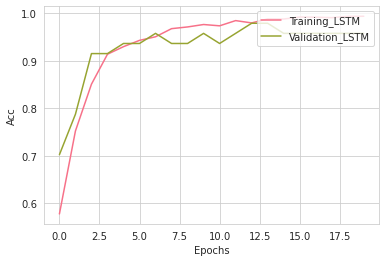

In [25]:
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['Training_LSTM','Validation_LSTM'],loc='upper right')

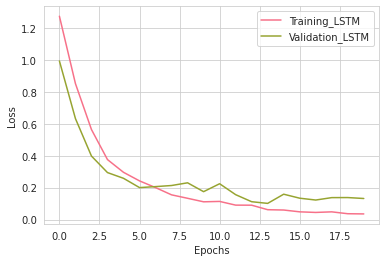

In [26]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training_LSTM','Validation_LSTM'],loc='upper right')

In [27]:
converter = tf.lite.TFLiteConverter.from_keras_model(lstm_model)
lstm_tflite_model = converter.convert()

open("lstm_model_half.tflite", "wb").write(lstm_tflite_model)

88080

In [28]:
lstm_model.save('lstm_model_half.h5') 

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(lstm_model)
converter.experimental_new_converter = True
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
converter.target_spec.supported_types = [tf.float16]
lstm_opt_tflite_model = converter.convert()
# Save the model to disk
open("lstm_model_quantized.tflite", "wb").write(lstm_opt_tflite_model)

In [18]:
basic_model_size = os.path.getsize("../Model/lstm_model_half.tflite")
print("Basic model is %d bytes" % basic_model_size)
#quantized_model_size = os.path.getsize("lstm_model_quantized.tflite")
#print("Quantized model is %d bytes" % quantized_model_size)
#difference = basic_model_size - quantized_model_size
#print("Difference is %d bytes" % difference)

Basic model is 121340 bytes


In [15]:
def reshape_function(data, label):
    reshaped_data = tf.reshape(data, [-1, 3, 1])
    return reshaped_data, label

In [ ]:
train_set = pd.read_csv('processed_train_set.csv',converters={'acceleration': eval})
test_set = pd.read_csv('processed_test_set.csv',converters={'acceleration': eval})
val_set = pd.read_csv('processed_val_set.csv',converters={'acceleration': eval})

tensor_train_set = tf.data.Dataset.from_tensor_slices(
    (np.array(train_set['acceleration'].tolist(),dtype=np.float64),
     train_set['gesture'].tolist()))

tensor_test_set = tf.data.Dataset.from_tensor_slices(
    (np.array(test_set['acceleration'].tolist(),dtype=np.float64),
     test_set['gesture'].tolist()))

tensor_val_set = tf.data.Dataset.from_tensor_slices(
    (np.array(val_set['acceleration'].tolist(),dtype=np.float64),
     val_set['gesture'].tolist()))

In [16]:
tensor_train_set_cnn = tensor_train_set.map(reshape_function)
tensor_test_set_cnn = tensor_test_set.map(reshape_function)
tensor_val_set_cnn = tensor_val_set.map(reshape_function)

In [17]:
tensor_train_set_cnn = tensor_train_set_cnn.batch(batch_size).repeat()
tensor_test_set_cnn = tensor_test_set_cnn.batch(batch_size)
tensor_val_set_cnn = tensor_val_set_cnn.batch(batch_size)

In [29]:
history=cnn_model.fit(
    tensor_train_set_cnn,
    epochs=epochs_cnn,
    validation_data=tensor_val_set_cnn,
    steps_per_epoch=300,
    validation_steps=int((len(val_set) - 1) / batch_size + 1))

Epoch 1/20
300/300 [==============================] - 6s 20ms/step - loss: 1.1463 - accuracy: 0.5707 - val_loss: 0.7014 - val_accuracy: 0.5745
Epoch 2/20
300/300 [==============================] - 6s 20ms/step - loss: 0.9029 - accuracy: 0.6595 - val_loss: 0.5756 - val_accuracy: 0.8936
Epoch 3/20
300/300 [==============================] - 6s 21ms/step - loss: 0.7011 - accuracy: 0.7875 - val_loss: 0.3864 - val_accuracy: 0.9574
Epoch 4/20
300/300 [==============================] - 6s 21ms/step - loss: 0.5843 - accuracy: 0.8049 - val_loss: 0.2306 - val_accuracy: 0.9362
Epoch 5/20
300/300 [==============================] - 6s 20ms/step - loss: 0.5759 - accuracy: 0.8121 - val_loss: 0.3279 - val_accuracy: 0.9574
Epoch 6/20
300/300 [==============================] - 6s 19ms/step - loss: 0.4473 - accuracy: 0.8529 - val_loss: 0.1103 - val_accuracy: 0.9574
Epoch 7/20
300/300 [==============================] - 6s 20ms/step - loss: 0.3584 - accuracy: 0.8740 - val_loss: 0.1655 - val_accuracy: 0.9149

In [30]:
history2=cnn_model2.fit(
    tensor_train_set_cnn,
    epochs=epochs_cnn,
    validation_data=tensor_val_set_cnn,
    steps_per_epoch=300,
    validation_steps=int((len(val_set) - 1) / batch_size2 + 1))

Epoch 1/20
300/300 [==============================] - 6s 21ms/step - loss: 1.4529 - accuracy: 0.4082 - val_loss: 0.9475 - val_accuracy: 0.7188
Epoch 2/20
300/300 [==============================] - 6s 21ms/step - loss: 1.0001 - accuracy: 0.6004 - val_loss: 0.5586 - val_accuracy: 0.8125
Epoch 3/20
300/300 [==============================] - 6s 21ms/step - loss: 0.6636 - accuracy: 0.7749 - val_loss: 0.3803 - val_accuracy: 0.9688
Epoch 4/20
300/300 [==============================] - 6s 21ms/step - loss: 0.5778 - accuracy: 0.7948 - val_loss: 0.4439 - val_accuracy: 0.7812
Epoch 5/20
300/300 [==============================] - 6s 21ms/step - loss: 0.5325 - accuracy: 0.8190 - val_loss: 0.2879 - val_accuracy: 0.9375
Epoch 6/20
300/300 [==============================] - 6s 21ms/step - loss: 0.2707 - accuracy: 0.9093 - val_loss: 0.1118 - val_accuracy: 0.9688
Epoch 7/20
300/300 [==============================] - 6s 20ms/step - loss: 0.2527 - accuracy: 0.9136 - val_loss: 0.0873 - val_accuracy: 0.9688

In [31]:
loss_cnn, acc_cnn = cnn_model.evaluate(tensor_test_set_cnn)
pred_cnn = np.argmax(cnn_model.predict(tensor_test_set_cnn), axis=1)
confusion_cnn = tf.math.confusion_matrix(
    labels=tf.constant(test_set['gesture'].to_numpy()),
    predictions=tf.constant(pred_cnn),
    num_classes=5)

loss_cnn2, acc_cnn2 = cnn_model2.evaluate(tensor_test_set_cnn)
pred_cnn2 = np.argmax(cnn_model2.predict(tensor_test_set_cnn), axis=1)
confusion_cnn2 = tf.math.confusion_matrix(
    labels=tf.constant(test_set['gesture'].to_numpy()),
    predictions=tf.constant(pred_cnn2),
    num_classes=5)

1/1 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000


In [32]:
print(confusion_cnn)
print("Loss {}, Accuracy {}".format(loss_cnn, acc_cnn))
print(confusion_cnn2)
print("Loss {}, Accuracy {}".format(loss_cnn2, acc_cnn2))

tf.Tensor(
[[12  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  2  6]], shape=(5, 5), dtype=int32)
Loss 0.0410902164876461, Accuracy 0.96875
tf.Tensor(
[[12  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0  8]], shape=(5, 5), dtype=int32)
Loss 0.008880273438990116, Accuracy 1.0


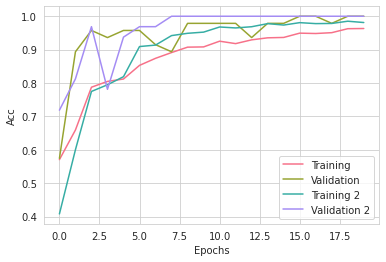

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['Training','Validation','Training 2', 'Validation 2'],loc='lower right')


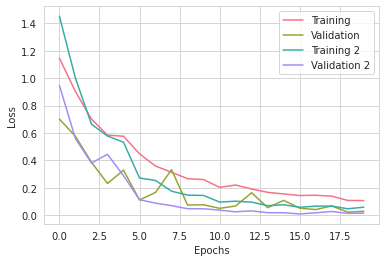

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training','Validation','Training 2', 'Validation 2'],loc='upper right')



Overfitting if: training loss << validation loss

Underfitting if: training loss >> validation loss

In [39]:
cnn_model3.save('cnn_model3_half.h5') 

In [40]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model3)
cnn_tflite_model = converter.convert()

open("../Model/cnn_model3_half.tflite", "wb").write(cnn_tflite_model)

17052

In [41]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model3)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
cnn_opt_tflite_model = converter.convert()
# Save the model to disk
open("../Model/cnn_model_quantized3_half.tflite", "wb").write(cnn_opt_tflite_model)

8832

In [43]:
basic_model_size = os.path.getsize("../Model/cnn_model3_half.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("../Model/cnn_model_quantized3_half.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 17052 bytes
Quantized model is 8832 bytes
Difference is 8220 bytes


In [ ]:
# Install xxd if it is not available
!sudo apt-get -qq install xxd
# Save the file as a C source file
!xxd -i cnn_model_quantized.tflite > cnn_opt_model.cc
# Print the source file
!cat /cnn_opt_model.cc

In [35]:
history3=cnn_model3.fit(
    tensor_train_set_cnn,
    epochs=epochs_cnn,
    validation_data=tensor_val_set_cnn,
    steps_per_epoch=300,
    validation_steps=int((len(val_set) - 1) / batch_size2 + 1))

Epoch 1/20
300/300 [==============================] - 6s 19ms/step - loss: 1.4002 - accuracy: 0.4759 - val_loss: 0.6241 - val_accuracy: 0.9062
Epoch 2/20
300/300 [==============================] - 5s 18ms/step - loss: 0.8905 - accuracy: 0.7069 - val_loss: 0.3382 - val_accuracy: 0.9688
Epoch 3/20
300/300 [==============================] - 6s 19ms/step - loss: 0.5710 - accuracy: 0.8441 - val_loss: 0.2059 - val_accuracy: 0.9688
Epoch 4/20
300/300 [==============================] - 6s 18ms/step - loss: 0.4809 - accuracy: 0.8564 - val_loss: 0.1734 - val_accuracy: 0.9688
Epoch 5/20
300/300 [==============================] - 5s 18ms/step - loss: 0.4150 - accuracy: 0.8788 - val_loss: 0.1749 - val_accuracy: 1.0000
Epoch 6/20
300/300 [==============================] - 5s 18ms/step - loss: 0.2771 - accuracy: 0.9179 - val_loss: 0.0703 - val_accuracy: 0.9688
Epoch 7/20
300/300 [==============================] - 6s 19ms/step - loss: 0.3128 - accuracy: 0.8997 - val_loss: 0.0908 - val_accuracy: 0.9688

In [36]:
loss_cnn3, acc_cnn3 = cnn_model3.evaluate(tensor_test_set_cnn)
pred_cnn3 = np.argmax(cnn_model3.predict(tensor_test_set_cnn), axis=1)
confusion_cnn3 = tf.math.confusion_matrix(
    labels=tf.constant(test_set['gesture'].to_numpy()),
    predictions=tf.constant(pred_cnn3),
    num_classes=5)

print(confusion_cnn2)
print("Loss {}, Accuracy {}".format(loss_cnn2, acc_cnn2))

print(confusion_cnn3)
print("Loss {}, Accuracy {}".format(loss_cnn3, acc_cnn3))

1/1 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
tf.Tensor(
[[12  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0  8]], shape=(5, 5), dtype=int32)
Loss 0.008880273438990116, Accuracy 1.0
tf.Tensor(
[[12  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0  8]], shape=(5, 5), dtype=int32)
Loss 0.001651971833780408, Accuracy 1.0


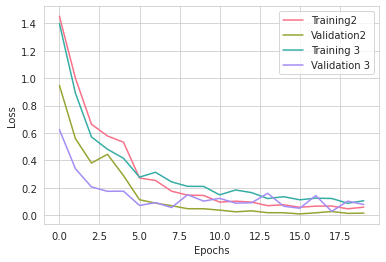

In [37]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training2','Validation2','Training 3', 'Validation 3'],loc='upper right')

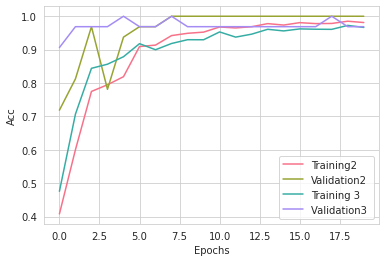

In [38]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])

plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['Training2','Validation2','Training 3', 'Validation3 '],loc='lower right')

In [49]:
!xxd -i ../Model/cnn_model_quantized3_half.tflite > ../Model/cnn_opt_model3_half.cc

In [50]:
!cat ../Model/cnn_opt_model3_half.cc

unsigned char ___Model_cnn_model_quantized3_half_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x12, 0x00, 0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0xfc, 0x21, 0x00, 0x00, 0x78, 0x18, 0x00, 0x00,
  0x60, 0x18, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x04, 0x00, 0x08, 0x00, 0x08, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x13, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f,
  0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73,
  0x69, 0x6f, 0x6e, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x18, 0x00, 0x00,
  0x04, 0x18, 0x00, 0x00, 0xc8, 0x17, 0x00, 0x00, 0x74, 0x17, 0x00, 0x00,
  0x20, 0x17, 0x00, 0x00, 0xfc, 0x16, 0x00, 0x00, 0xd8, 0x16, 0x00, 0x00,
  0xc4, 0x0b, 0x00, 0x00, 0x70, 0x0a, 0x00, 0x00, 

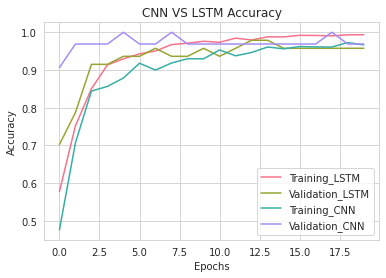

In [46]:
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN VS LSTM Accuracy')
plt.legend(['Training_LSTM','Validation_LSTM','Training_CNN','Validation_CNN'],loc='lower right')

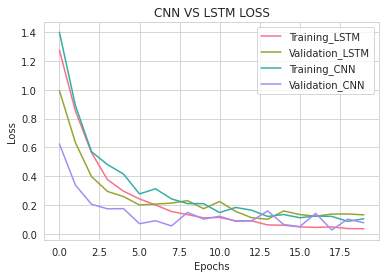

In [47]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN VS LSTM LOSS')
plt.legend(['Training_LSTM','Validation_LSTM','Training_CNN','Validation_CNN'],loc='upper right')

In [48]:
print(confusion_lstm)
print("Loss {}, Accuracy {}".format(loss_lstm, acc_lstm))
print("")
print(confusion_cnn3)
print("Loss {}, Accuracy {}".format(loss_cnn3, acc_cnn3))

tf.Tensor(
[[12  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 12  2]
 [ 0  0  0  0  8]], shape=(5, 5), dtype=int32)
Loss 0.10723546892404556, Accuracy 0.96875

tf.Tensor(
[[12  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0  8]], shape=(5, 5), dtype=int32)
Loss 0.001651971833780408, Accuracy 1.0
